<a href="https://colab.research.google.com/github/Kirtiwardhan01/ML-Hackathon-/blob/master/Novartis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the packages and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Exploring the dataset

train_df = pd.read_csv('/content/drive/My Drive/Novartis/Dataset/Train.csv')   #(23856, 18) 
target = train_df['MULTIPLE_OFFENSE']
train_df.drop(['MULTIPLE_OFFENSE'],1,inplace=True)

test_df = pd.read_csv('/content/drive/My Drive/Novartis/Dataset/Test.csv')     #(15903, 17)

dataset = pd.concat([train_df, test_df], axis=0, sort=False)


print(dataset.shape)

dataset.head()

(39759, 17)


,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [ ]:
#Let's see the details of the datasets
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39759 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  39759 non-null  object 
 1   DATE         39759 non-null  object 
 2   X_1          39759 non-null  int64  
 3   X_2          39759 non-null  int64  
 4   X_3          39759 non-null  int64  
 5   X_4          39759 non-null  int64  
 6   X_5          39759 non-null  int64  
 7   X_6          39759 non-null  int64  
 8   X_7          39759 non-null  int64  
 9   X_8          39759 non-null  int64  
 10  X_9          39759 non-null  int64  
 11  X_10         39759 non-null  int64  
 12  X_11         39759 non-null  int64  
 13  X_12         39450 non-null  float64
 14  X_13         39759 non-null  int64  
 15  X_14         39759 non-null  int64  
 16  X_15         39759 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 5.5+ MB
None


We first try to clean the data by visualising any NA/null values in the data set

In [ ]:
dataset_missingpercent = 100 * (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
print(dataset_missingpercent)



X_12           0.777183
X_15           0.000000
X_6            0.000000
DATE           0.000000
X_1            0.000000
X_2            0.000000
X_3            0.000000
X_4            0.000000
X_5            0.000000
X_7            0.000000
X_14           0.000000
X_8            0.000000
X_9            0.000000
X_10           0.000000
X_11           0.000000
X_13           0.000000
INCIDENT_ID    0.000000
dtype: float64


We will fill-in the blank values with mean of 'X_12' column thus retaining the info

In [ ]:
dataset['X_12'] = dataset['X_12'].fillna(dataset['X_12'].mean())
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39759 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  39759 non-null  object 
 1   DATE         39759 non-null  object 
 2   X_1          39759 non-null  int64  
 3   X_2          39759 non-null  int64  
 4   X_3          39759 non-null  int64  
 5   X_4          39759 non-null  int64  
 6   X_5          39759 non-null  int64  
 7   X_6          39759 non-null  int64  
 8   X_7          39759 non-null  int64  
 9   X_8          39759 non-null  int64  
 10  X_9          39759 non-null  int64  
 11  X_10         39759 non-null  int64  
 12  X_11         39759 non-null  int64  
 13  X_12         39759 non-null  float64
 14  X_13         39759 non-null  int64  
 15  X_14         39759 non-null  int64  
 16  X_15         39759 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 5.5+ MB
None


### Descriptive Statistics

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X_1,39759.0,0.477502,1.428755,0.0,0.0,0.0,0.0,7.0
X_2,39759.0,24.763777,15.235522,0.0,7.0,24.0,36.0,52.0
X_3,39759.0,24.612490,15.131877,0.0,8.0,24.0,35.0,52.0
X_4,39759.0,4.279735,2.956638,0.0,2.0,4.0,6.0,10.0
X_5,39759.0,2.452753,1.963184,0.0,1.0,3.0,5.0,5.0
X_6,39759.0,6.126462,4.463585,1.0,3.0,5.0,8.0,19.0
X_7,39759.0,4.870947,3.870959,0.0,2.0,4.0,7.0,18.0
X_8,39759.0,0.978168,1.460421,0.0,0.0,1.0,1.0,99.0
X_9,39759.0,4.917981,1.367462,0.0,5.0,5.0,6.0,6.0
X_10,39759.0,1.243366,1.017419,1.0,1.0,1.0,1.0,90.0


The describe method is used to find the summary statistics for every column

Now that the data is all cleaned and free of NaN values, we can go ahead



In [ ]:
# Let's Format the date column
dataset['DATE']=pd.to_datetime(dataset.DATE)  

# set the index as date              
dataset.set_index('DATE',inplace=True)

dataset.reset_index(inplace=True)

dataset.head()

,DATE,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,2004-07-04,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,2017-07-18,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,2017-03-15,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,2009-02-13,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,2005-04-13,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


#### Understand co-relation between variables


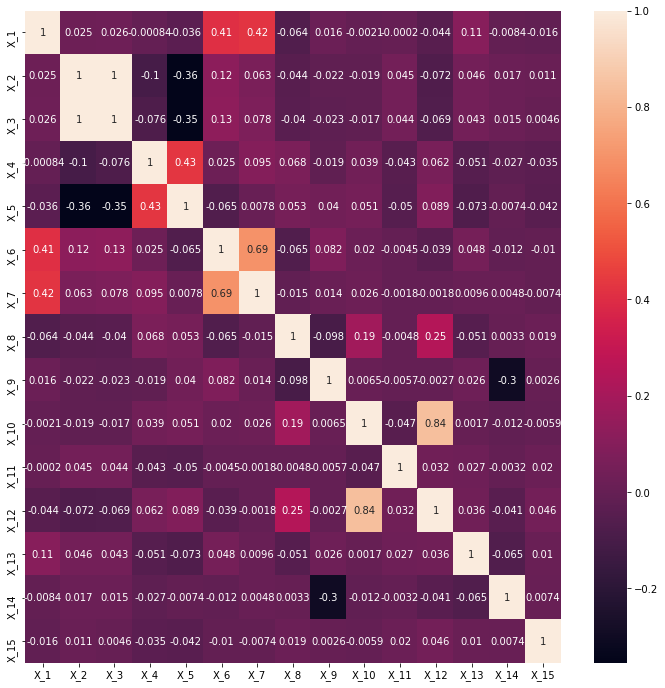

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True)

There are few columns that are positively correlated to each other and dropping one of them can help us in analysing 

In [ ]:
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
dataset.drop(to_drop, axis=1, inplace=True)

dataset.head()

,DATE,INCIDENT_ID,X_1,X_2,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_13,X_14,X_15
0,2004-07-04,CR_102659,0,36,2,1,5,6,1,6,1,174,92,29,36
1,2017-07-18,CR_189752,1,37,0,0,11,17,1,6,1,236,103,142,34
2,2017-03-15,CR_184637,0,3,3,5,1,0,2,3,1,174,110,93,34
3,2009-02-13,CR_139071,0,33,2,1,7,1,1,6,1,249,72,29,34
4,2005-04-13,CR_109335,0,33,2,1,8,3,0,5,1,174,112,29,43


In [ ]:
Incident_ID = dataset['INCIDENT_ID']
dataset.drop(['INCIDENT_ID','DATE'],1,inplace=True)

In [ ]:
#Split input and output into desired splits of train and validation
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

feature_set=ss.fit_transform(dataset)


In [ ]:
#Spliting the dataset into training and testing sets 
df_train = (feature_set[:23856])   #Used for training the model
df_test = (feature_set[23856:])    #Used as a final file for prediction

features=df_train
print(features.shape)
print(target.shape)
print(df_test.shape)

(23856, 13)
(23856,)
(15903, 13)


In [ ]:
#Split input and output into desired splits of train and validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.30,random_state=1234)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16699, 13)
(16699,)
(7157, 13)
(7157,)


### Building our base model

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(C=1.0, class_weight='balanced', dual=False, 	fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=7066, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix

In [ ]:
#Building the model
reg_model = reg.fit(X_train,y_train)
reg_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7066, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Doing the prediction 
pred_values = reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

predictions = [value for value in pred_values]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("score: %.2f%% on test dataset" % (score * 100.0))


Accuracy_score: 88.98% on test dataset
precision_score: 99.33% on test dataset
score: 89.06% on test dataset


From above we can see that our base model has an accuracy of 88% and a score of 89% which can be improved further with the help of few algorithms

### Building the model using SVM algorithm


In [ ]:
#Importing SVM algorithm from sklearn package
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=10)

svc_model = svc.fit(X=X_train, y=y_train)

pred_svc = svc.predict(X_test)

#Importing cross_validation module
from sklearn.model_selection import cross_val_score 

score_kfold = cross_val_score(svc, X_train, y_train, cv=5)
print("Cross Validation:" + str(score_kfold))
print("Cross Validation Mean:" + str(score_kfold.mean()))

predictions = [value for value in pred_svc]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("score: %.2f%% on test dataset" % (score * 100.0))



Cross Validation:[0.95538922 0.95538922 0.95538922 0.95508982 0.95537586]
Cross Validation Mean:0.9553266692132357
Accuracy_score: 95.50% on test dataset
precision_score: 95.50% on test dataset
score: 100.00% on test dataset


We can see that our SVM model has an accuracy of 95% and a score of 100% that has significantly improved compared to our base model built using logistic regression algorithm

We can imporve the accuracy further with fine tuning the hyperparameters

### Building the model using XGBoost algorithm




In [ ]:
# Fitting XGBoost to the Training set
import xgboost

classifier = xgboost.XGBClassifier()

classifier.fit(X_train, y_train)

# Predicting the Test set results
pred_boost = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_boost)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

predictions = [value for value in pred_boost]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("score: %.2f%% on test dataset" % (score * 100.0))


Accuracy_score: 99.71% on test dataset
precision_score: 99.82% on test dataset
score: 99.87% on test dataset


The model built with XGBoost algorithm gives an accuracy of 99.71 & and a score of 99.87% which surpasses both model's accuracy and let's fine tune XGBoost parameters to see if there is any enhancement in the model

**Hyperparameter Tuning in XGBoost algorithm**

In [ ]:
# Fitting XGBoost to the Training set with hyperparameter tuning 

classifier2 = xgboost.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10) 

classifier2.fit(X_train, y_train)

# Predicting the Test set results
pred_boost2 = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_boost2)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

predictions = [value for value in pred_boost2]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("score: %.2f%% on test dataset" % (score * 100.0))


Accuracy_score: 99.61% on test dataset
precision_score: 99.68% on test dataset
score: 99.91% on test dataset


After tuning the hyperparameters we can see that score has slightly improved and the overall model looks robust and indicates that there is no overfitting

Let's go ahead with our last step of using the above model for predictions 

Let's save our model using pickle so the next time we open the files, we can save time in running the model again and proceed with predictions

In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier2) 
  
# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
result = model_from_pickle.predict(df_test)      #np.array
print(result)

#Converting the result variable to dataframe
submission = pd.DataFrame(result)

[1 1 1 ... 1 1 1]


In [ ]:
#Final submission dataframe with Incident_ID and Multiple_Offense
submission['Incident_ID'] = (test_df['INCIDENT_ID'])
submission = submission.rename(columns={0: 'Multiple_Offense'})
submission['Multiple_Offense'].value_counts()

1    15186
0      717
Name: Multiple_Offense, dtype: int64

_______________________________________________________________________________

________________________________________________________________________________________________________________________________________________________________

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++